In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
## Seeding RNG
np.random.seed(223)

In [3]:
#Opening Dataset

#Dataset has 333 entries. Will split into 222 to train and 111 to test and see
#if our neural net makes any meaningful predictions

HousingData = pd.read_csv('Data/HousingTrain.csv')

#Lets look for patterns in crime and tax rate to median home value

TrainData = HousingData[0:222]
TestData = HousingData[222:333]

In [4]:
class NeuralNetwork(object):
    def __init__(self, hiddenLayers):
        
        self.inLayers = 2
        self.outLayers = 1
        self.hiddenLayers = hiddenLayers
        

        #Initializing Layer Weights Randomly
        #  One set of weights per layer (see above inLayers variable)
        
        #Weights of First Layer 
        self.W1 =np.random.randn(self.inLayers, self.hiddenLayers)
        #Weights of Second Layer
        self.W2 =np.random.randn(self.hiddenLayers, self.outLayers) 
        

    def forward(self, X):

        # Activation function applied to layer and feeding it forward to the next layer

        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        
        self.z3 = np.dot(self.a2, self.W2)
        
        yEst = self.sigmoid(self.z3)
        
        return yEst
    
    def sigmoid(self, z):
        # da activation function du jour
        return 1/(1+np.exp(-z))
        
    def delsigmoid(self, z):
        #derivative of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def JJ(self, X, y):
        
        self.yEst = self.forward(X)
        
        #Error surface
        J = 0.5*sum((y-self.yEst)**2)
        
        return J
    
    def delJJ(self, X, y):
        
        self.yEst = self.forward(X)
        del3 = np.multiply(-(y-self.yEst), self.delsigmoid(self.z3))
        
        #Backprop of 2nd layer
        gradientW2 = np.dot(self.a2.T, del3)
        #Backprop of 1st layer
        del2 = np.dot(del3, self.W2.T)*self.delsigmoid(self.z2)
        gradientW1 = np.dot(X.T, del2)
        
        return gradientW1, gradientW2

In [5]:
#Start NN
testNN = NeuralNetwork(3) #Network with 3 Hidden Layers

# Define Data

x1 = np.array(TrainData['crim'],dtype = float) #first Col
x2 = np.array(TrainData['tax'],dtype = float) #second Col
#Normalizing
x1n= x1/np.max(x1)
x2n= x2/np.max(x2)





X = np.stack((x1,x2)).T
Xn = np.stack((x1n,x2n)).T

y = np.array(TrainData['medv'], dtype = float)
y= np.array(y, dtype=float).T

#X = np.random.rand(10000,2)
#y = np.apply_along_axis(lambda el: el[0]+el[1], axis=1, arr=X)
y.shape = (222,1)

In [6]:
# Normalizing
yn= y/np.max(y)

In [7]:
#iterating
maxnum = 10000
loop = 0

lamb =.001

while loop < maxnum:
    
    dW1, dW2 = testNN.delJJ(Xn, yn)
    
    testNN.W1 = testNN.W1 - lamb*dW1
    testNN.W2 = testNN.W2 - lamb*dW2
    
    loop = loop+1
    if loop % 1000 ==0:
        print testNN.JJ(Xn, yn)

[3.1469513]
[3.13320064]
[3.1184256]
[3.10247236]
[3.08534767]
[3.0672358]
[3.04848884]
[3.02958053]
[3.01102973]
[2.99331576]


In [8]:
print testNN.forward(Xn[:5])

[[0.51448336]
 [0.52347378]
 [0.52689315]
 [0.52609394]
 [0.51015077]]


In [9]:
yn[:5]

array([[0.48 ],
       [0.432],
       [0.668],
       [0.724],
       [0.458]])

In [10]:
xt1 = np.array(TestData['crim'],dtype = float) #first Col
xt2 = np.array(TestData['tax'],dtype = float) #second Col

#Normalizing
xt1= xt1/np.max(x1)
xt2 = xt2 /np.max(x2)

Xt = np.stack((xt1,xt2)).T 

In [11]:
TestResults = np.multiply(np.max(y),testNN.forward(Xt))

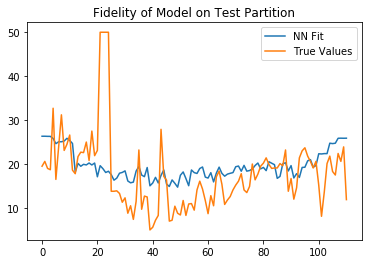

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(np.arange(111), TestResults, label='NN Fit')
plt.plot(np.arange(111), TestData['medv'], label='True Values')
plt.legend()
plt.title('Fidelity of Model on Test Partition')
plt.savefig('Output/TestPartitionLow.png')
plt.show()



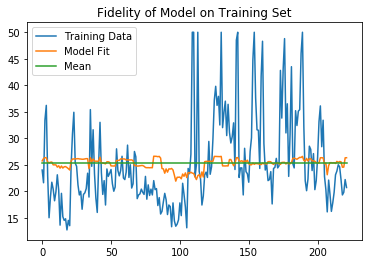

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(np.arange(222), y, label='Training Data')
plt.plot(np.arange(222), np.max(y)*testNN.forward(Xn), label='Model Fit')
plt.plot(np.arange(222), np.mean(y)*np.ones(222), label='Mean')
plt.legend()
plt.title('Fidelity of Model on Training Set')
plt.savefig('Output/TrainingPartitionLow.png')
plt.show()



In [14]:
## Error Metric on Test Data

MSE = np.mean((TestResults.T-np.array(TestData['medv'], dtype=float))**2)

print MSE


64.90121005607126
